In [6]:
!pip install opencv-python tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 401.4 kB/s eta 0:00:0000:0100:05
  Using cached libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.whl (14.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 1.3 MB/s eta 0:00:0000:0100:01
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-3.19.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached h5py-3.7.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (4.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 1.9 MB/s eta 0:00:0000:0100:01
  Using cached typing_extensions-4.3.0-py3-none-any.w

In [1]:
## File/Folder Management
import os
import shutil
import pathlib

## Data Manipulation
import pandas as pd
import numpy as np

## Computer Vision
import cv2
import matplotlib.pyplot as plt

# Tensorflow 
import tensorflow as tf
from tensorflow.keras.layers import Layer,Input,Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Model

2022-09-09 16:59:07.657841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-09 16:59:07.914223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/harsh/venv/lib/python3.10/site-packages/cv2/../../lib64:
2022-09-09 16:59:07.914247: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-09 16:59:07.956204: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already bee

In [2]:
def preprocess_test_image(image_path:str):
    # Read in image from file path
    img = cv2.imread(r'D:\Image\st5.png',0)
    ret, bw = cv2.threshold(img, 190,255,cv2.THRESH_BINARY_INV)

    connectivity = 4
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(bw, connectivity, cv2.CV_32S)
    sizes = stats[1:, -1]; nb_components = nb_components - 1
    min_size = 50 #threshhold value for small noisy components
    img2 = np.zeros((output.shape), np.uint8)

    for i in range(0, nb_components):
        if sizes[i] >= min_size:
            img2[output == i + 1] = 255

    res = cv2.bitwise_not(img2)
    return res


In [10]:
## Siamese Distance class
class L1Dist(Layer):
  def __init__(self,**kwargs):
    super().__init__()
  
  def call(self,input_embedding,validation_embedding):
    return tf.math.abs(input_embedding-validation_embedding)

In [11]:
siamese_model=tf.keras.models.load_model('../model/siamesemodelfocal.h5',
                                         custom_objects={'L1Dist':L1Dist, 'BinaryFocalCrossentropy':tf.keras.losses.BinaryFocalCrossentropy})


2022-09-09 17:00:35.917053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/harsh/venv/lib/python3.10/site-packages/cv2/../../lib64:
2022-09-09 17:00:35.917109: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-09 17:00:35.917142: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (harsh-Inspiron-5567): /proc/driver/nvidia/version does not exist
2022-09-09 17:00:35.917564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-09 17:00:36.27

2022-09-09 17:00:46.239837: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 452984832 exceeds 10% of free system memory.


In [24]:
def preprocess_test_image(image_path:str):
    # Read in image from file path
    img = cv2.imread(image_path,0)
    img=cv2.resize(img,(200,100),cv2.INTER_AREA)
    ret, bw = cv2.threshold(img, 190,255,cv2.THRESH_BINARY_INV)

    connectivity = 50
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(bw, connectivity, cv2.CV_32S)
    sizes = stats[1:, -1]; nb_components = nb_components - 1
    min_size = 50 #threshhold value for small noisy components
    img2 = np.zeros((output.shape), np.uint8)

    for i in range(0, nb_components):
        if sizes[i] >= min_size:
            img2[output == i + 1] = 255

    res = cv2.bitwise_not(img2)
    res=np.expand_dims(res,-1)
    res=np.expand_dims(res,0)
    return res 


In [31]:
anchor_image=preprocess_test_image('../test/sign1/og.jpg')
val_image=preprocess_test_image('../test/sign1/fake.jpg')

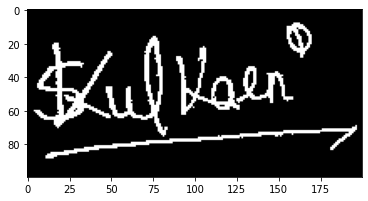

In [38]:
plt.imshow(val_image[0,:,:],cmap='binary')

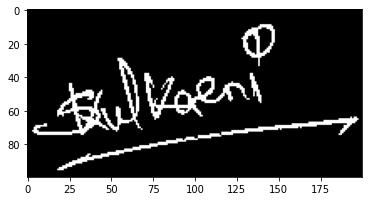

In [37]:
plt.imshow(anchor_image[0,:,:],cmap='binary')

In [33]:
siamese_model.predict([anchor_image,val_image])

1/1 [==============================] - 1s 976ms/step


array([[0.01018987]], dtype=float32)

Hey,
I'm Tejashree Ghude (19CE1033)
I want to optout from LTI and Cognizant Placement drives as I have been selected for ASE role by Accenture.
Kindly look into the matter.